# Procesos ETL
## Transformación

### Paso 1.
Importar Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from extraccion import Extraccion as extra

## Paso 2.
Rutas de los insumos

In [2]:
ruta_actual = os.getcwd()
print(ruta_actual)
extraccion = extra()


D:\Proyectos\etl\scr


In [3]:
path_ds_world_population = os.path.join(ruta_actual,'data/data_population_world.csv').replace("\\","/")
path_metadata = os.path.join(ruta_actual,'data/metadata_countries.csv').replace("\\","/")
path_codes = os.path.join(ruta_actual,'data/country_list.csv').replace("\\","/")
path_years_schooling = os.path.join(ruta_actual,'data/mean-years-of-schooling-long-run.csv').replace("\\","/")
path_countries_gdp = os.path.join(ruta_actual,'data/countries_gdp_hist.csv').replace("\\","/")
path_organizations_gdp = os.path.join(ruta_actual,'data/organizations_gdp_hist.csv').replace("\\","/")

## Paso 3.
Cargar los Datasets

In [4]:
df_popu = extraccion.extraccion_csv(path_ds_world_population,separador=',')
df_meta = extraccion.extraccion_csv(path_metadata, separador=',')
df_codes = extraccion.extraccion_csv(path_codes, separador=',')
df_avg_schooling = extraccion.extraccion_csv(path_years_schooling, separador=';')
df_countries_gdp = extraccion.extraccion_csv(path_countries_gdp, separador=';')
df_organizations_gdp = extraccion.extraccion_csv(path_organizations_gdp, separador=',')

## Exploración

## Previsualización de los datos

In [5]:
print(df_popu.head())

  Country Name Country Code    Indicator Name Indicator Code         1960  \
0        Aruba          ABW  Población, total    SP.POP.TOTL      54608.0   
1          NaN          AFE  Población, total    SP.POP.TOTL  130692579.0   
2   Afganistán          AFG  Población, total    SP.POP.TOTL    8622466.0   
3          NaN          AFW  Población, total    SP.POP.TOTL   97256290.0   
4       Angola          AGO  Población, total    SP.POP.TOTL    5357195.0   

          1961         1962         1963         1964         1965  ...  \
0      55811.0      56682.0      57475.0      58178.0      58782.0  ...   
1  134169237.0  137835590.0  141630546.0  145605995.0  149742351.0  ...   
2    8790140.0    8969047.0    9157465.0    9355514.0    9565147.0  ...   
3   99314028.0  101445032.0  103667517.0  105959979.0  108336203.0  ...   
4    5441333.0    5521400.0    5599827.0    5673199.0    5736582.0  ...   

          2013         2014         2015         2016         2017  \
0     102880.0  

In [6]:
print(df_meta.head())

  Country Name Country Code  \
0        Aruba          ABW   
1          NaN          AFE   
2   Afganistán          AFG   
3          NaN          AFW   
4       Angola          AGO   

                                              Region  \
0                                                NaN   
1                                                NaN   
2                                    Asia meridional   
3                                                NaN   
4  África al sur del Sahara (excluido altos ingre...   

                     Income_Group  Unnamed: 4  
0                    Ingreso alto         NaN  
1                       Agregados         NaN  
2          Países de ingreso bajo         NaN  
3                       Agregados         NaN  
4  Países de ingreso mediano bajo         NaN  


## Estructura Datasets

In [7]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [8]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  266 non-null    object 
 2   Region        136 non-null    object 
 3   Income_Group  266 non-null    object 
 4   Unnamed: 4    0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 10.5+ KB


### Transformar Dataset df_population de vertical a horizontal 

In [9]:
df_popu_c = pd.melt(
    df_popu,
    id_vars=['Country Name','Country Code','Indicator Name', 'Indicator Code'],
    value_vars = df_popu.iloc[:,4:-1].columns,
    var_name = 'year',
    value_name=('total')
)
                    

In [10]:
df_popu_c.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,total
0,Aruba,ABW,"Población, total",SP.POP.TOTL,1960,54608.0
1,NaN,AFE,"Población, total",SP.POP.TOTL,1960,130692579.0
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,1960,8622466.0
3,NaN,AFW,"Población, total",SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,"Población, total",SP.POP.TOTL,1960,5357195.0


In [11]:
df_popu_c.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,year,total
16487,Kosovo,XKX,"Población, total",SP.POP.TOTL,2021,1786038.0
16488,"Yemen, Rep. del",YEM,"Población, total",SP.POP.TOTL,2021,32981641.0
16489,Sudáfrica,ZAF,"Población, total",SP.POP.TOTL,2021,59392255.0
16490,Zambia,ZMB,"Población, total",SP.POP.TOTL,2021,19473125.0
16491,Zimbabwe,ZWE,"Población, total",SP.POP.TOTL,2021,15993524.0


In [12]:
df_popu_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16368 non-null  object 
 1   Country Code    16492 non-null  object 
 2   Indicator Name  16492 non-null  object 
 3   Indicator Code  16492 non-null  object 
 4   year            16492 non-null  object 
 5   total           16400 non-null  float64
dtypes: float64(1), object(5)
memory usage: 773.2+ KB


## Descripción de estadísticas básicas 

In [13]:
df_popu_c.describe()

,total
count,1.640000e+04
mean,2.140804e+08
std,7.040554e+08
min,2.646000e+03
25%,9.863025e+05
50%,6.731400e+06
75%,4.602445e+07
max,7.888409e+09


In [14]:
df_meta.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## Indentificar valores únicos 

In [15]:
df_popu_c.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'year', 'total'],
      dtype='object')

In [16]:
df_popu_c['Country Name'].nunique()

264

In [17]:
df_meta.columns

Index(['Country Name', 'Country Code', 'Region', 'Income_Group', 'Unnamed: 4'], dtype='object')

In [18]:
df_meta['Region'].nunique()

6

## Detección de valores nulos

In [19]:
df_popu_c.isnull().sum()

Country Name      124
Country Code        0
Indicator Name      0
Indicator Code      0
year                0
total              92
dtype: int64

In [20]:
df_popu.isnull().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2018                1
2019                1
2020                1
2021                1
Unnamed: 66       266
Length: 67, dtype: int64

In [21]:
df_popu_c.isnull().mean()*100

Country Name      0.751880
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
year              0.000000
total             0.557846
dtype: float64

In [22]:
df_meta.isnull().sum()

Country Name      2
Country Code      0
Region          130
Income_Group      0
Unnamed: 4      266
dtype: int64

In [23]:
print(df_meta.isnull().mean()*100)

Country Name      0.75188
Country Code      0.00000
Region           48.87218
Income_Group      0.00000
Unnamed: 4      100.00000
dtype: float64


## Visualización de la distribución de datos numéricos

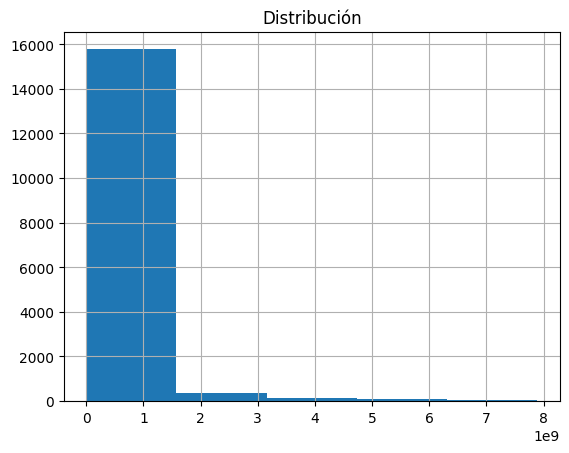

In [28]:
df_popu_c['total'].hist(bins=5)
plt.title('Distribución')
plt.show()

## Relación entre variables categóricas y numéricas

In [30]:
df_popu_c.groupby('Country Name')['total'].sum().astype(int).sort_values(ascending=False)

Country Name
Mundo                     332735496461
BIRF y la AIF             272079553443
Ingreso mediano y bajo    267739006632
 Ingreso mediano          245959744365
Sólo BIRF                 214109753593
                              ...     
Islas Turcas y Caicos          1046851
Palau                           944859
Nauru                           550893
Tuvalu                          528220
No clasificado                       0
Name: total, Length: 264, dtype: int64

## Detección de valores atípicos (outliers)

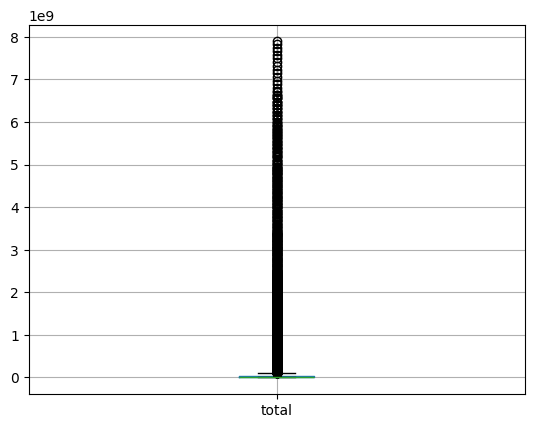

In [32]:
df_popu_c.boxplot(column='total')
plt.show()

In [35]:
df_2000 = df_popu_c[df_popu_c['year'] == '2000']
print(df_popu_c['year'])

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
16487    2021
16488    2021
16489    2021
16490    2021
16491    2021
Name: year, Length: 16492, dtype: object


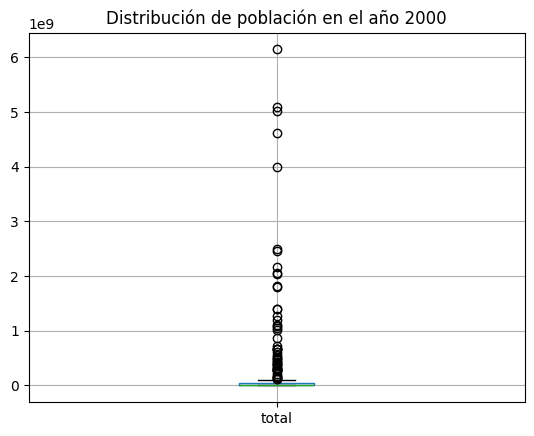

In [36]:
df_2000.boxplot(column='total')
plt.title("Distribución de población en el año 2000")
plt.show()

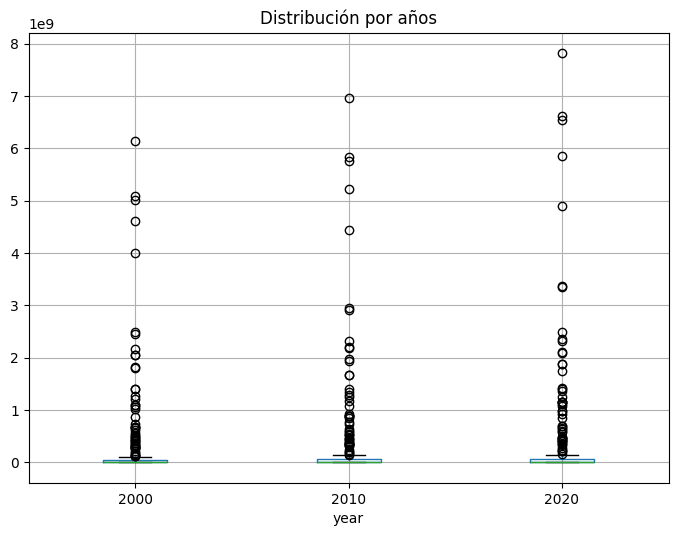

In [37]:
df_popu_c[df_popu_c['year'].isin(['2000','2010','2020'])].boxplot(
    column='total', by='year', figsize=(8,6))
plt.suptitle("")
plt.title("Distribución por años")
plt.show()


In [38]:
print("Máximo:", df_2000.loc[df_2000['total'].idxmax(), ['Country Name','total']])

Máximo: Country Name           Mundo
total           6144322697.0
Name: 10899, dtype: object


# Detección y manejo de valores Nulos

## Cantidad de valores nulos por columna

In [39]:
df_popu_c.isna().sum()

Country Name      124
Country Code        0
Indicator Name      0
Indicator Code      0
year                0
total              92
dtype: int64

In [40]:
df_popu_c.isnull().sum()

Country Name      124
Country Code        0
Indicator Name      0
Indicator Code      0
year                0
total              92
dtype: int64

## Visualización gráfica de valores nulos

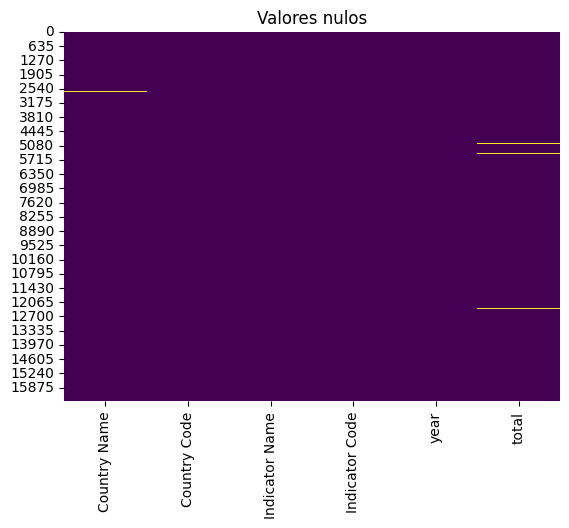

In [42]:
sns.heatmap(df_popu_c.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()

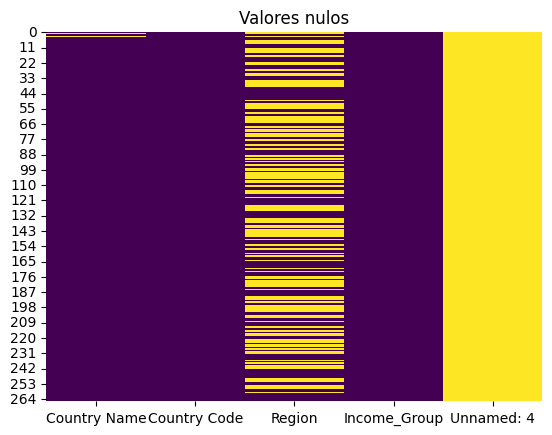

In [43]:
sns.heatmap(df_meta.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()

## Eliminación de filas con valores nulos

In [44]:
df_popu_c.isna().sum()

Country Name      124
Country Code        0
Indicator Name      0
Indicator Code      0
year                0
total              92
dtype: int64

In [45]:
df_popu_c = df_popu_c.dropna(subset=['total'])

In [46]:
df_popu_c.isna().sum()

Country Name      124
Country Code        0
Indicator Name      0
Indicator Code      0
year                0
total               0
dtype: int64

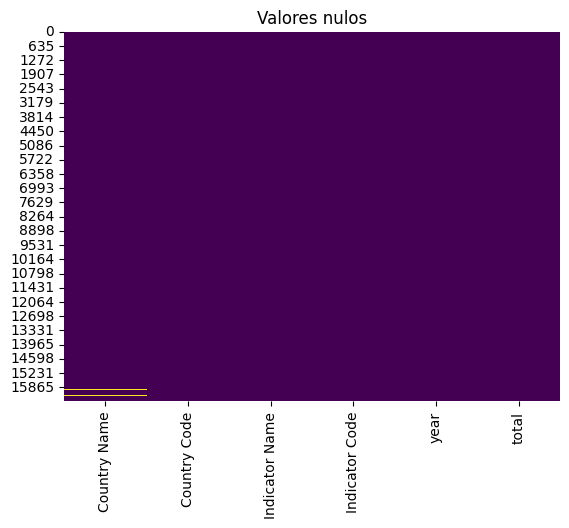

In [47]:
sns.heatmap(df_popu_c.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()

## Eliminación de filas o columnas con muchos valores nulos

In [48]:
ts = 0.5
df_meta_c = df_meta.dropna(thresh=int(ts * df_meta.shape[0]), axis=1)

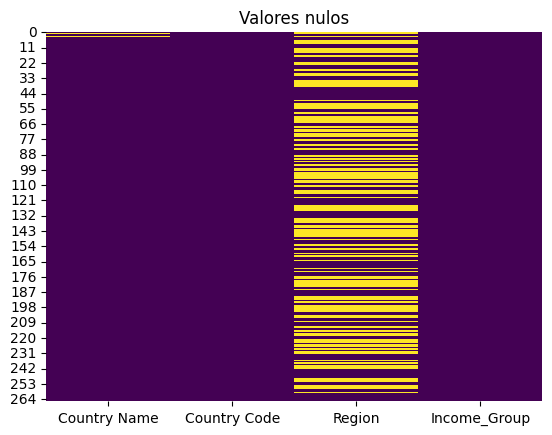

In [49]:
sns.heatmap(df_meta_c.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()

### Imputación de valores faltantes en 'region' con 'Sin region'

In [51]:
df_meta_c.loc[:, 'Region'] = df_meta_c['Region'].fillna('Sin region')

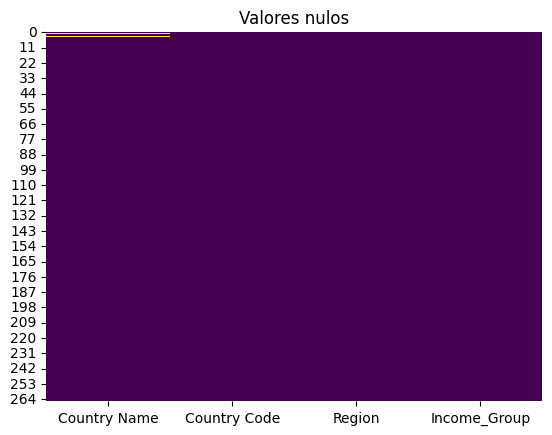

In [52]:
sns.heatmap(df_meta_c.isna(), cbar=False, cmap='viridis')
plt.title('Valores nulos')
plt.show()